## 练习

### 1、使用多种方法对boston数据集进行回归，画出回归图像，并比较多种回归方法的效果

from sklearn.datasets import load_boston

boston = load_boston()

x = boston.data

y = boston.target

In [1]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.datasets import load_boston

import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt

In [2]:
boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [3]:
print("Boston House Prices dataset\n===========================\n\nNotes\n------\nData Set Characteristics:  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive\n    \n    :Median Value (attribute 14) is usually the target\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000\n        - PTRATIO  pupil-teacher ratio by town\n        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\n        - LSTAT    % lower status of the population\n        - MEDV     Median value of owner-occupied homes in $1000's\n\n    :Missing Attribute Values: None\n\n    :Creator: Harrison, D. and Rubinfeld, D.L.\n\nThis is a copy of UCI ML housing dataset.\nhttp://archive.ics.uci.edu/ml/datasets/Housing\n\n\nThis dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.\n\nThe Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic\nprices and the demand for clean air', J. Environ. Economics & Management,\nvol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics\n...', Wiley, 1980.   N.B. Various transformations are used in the table on\npages 244-261 of the latter.\n\nThe Boston house-price data has been used in many machine learning papers that address regression\nproblems.   \n     \n**References**\n\n   - Belsley, Kuh & Welsch, 'Regression diagnostics: Identifying Influential Data and Sources of Collinearity', Wiley, 1980. 244-261.\n   - Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning. In Proceedings on the Tenth International Conference of Machine Learning, 236-243, University of Massachusetts, Amherst. Morgan Kaufmann.\n   - many more! (")

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [26]:
df = DataFrame(boston.data,columns=boston.feature_names)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [8]:
data = boston.data  # 样本的特征值
target = boston.target  # 样本的目标值

In [10]:
# 分成 训练数据 和 测试数据
# data.shape  450之前的 用来训练 之后的用来测试
# 训练数据
X_train = data[:450]
y_train = target[:450]
# 测试数据
X_test = data[450:]  # 测试数据的特征值
y_test = target[450:]  # 测试数据的结果

In [11]:
# 获取模型 训练模型
lr = LinearRegression()
rr = Ridge()
lasso = Lasso()

In [12]:
lr.fit(X_train,y_train)
rr.fit(X_train,y_train)
lasso.fit(X_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [14]:
y_lr_ = lr.predict(X_test)
y_rr_ = rr.predict(X_test)
y_lasso_ = lasso.predict(X_test)

In [ ]:
y_test

In [15]:
# 这里画图只是展示各种预测值和真实值的差异 不是趋势的回归曲线

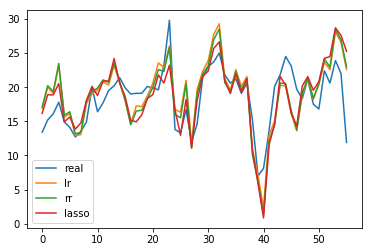

In [23]:
plt.plot(y_test,label='real')
plt.plot(y_lr_,label='lr')
plt.plot(y_rr_,label='rr')
plt.plot(y_lasso_,label='lasso')
plt.legend()  # 一般情况下 用普通线性回归即可 图片中的情况用rr
# 如果有很多特征 但是其中的一部分特征肯能是没用的 这个时候可以用lasso试一试

In [24]:
lr.score(X_test,y_test)  # 回归问题不能只看得分

0.37669768810744486

In [ ]:
# 找一个特征来画图 给大家看看 三种线性回归对趋势的分析的效果 

In [ ]:
# 只研究 查尔斯河 与房价的 趋势关系

In [28]:
df['CHAS'].unique()  # 0是不挨着河 1是挨着河

array([0., 1.])

In [29]:
X_train = df['CHAS']  # 训练集的特征是 查尔斯河
y_train = target  # 训练集的结果值是 房价

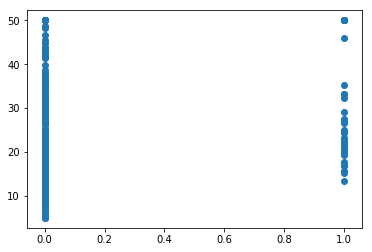

In [30]:
plt.scatter(X_train,y_train)

In [31]:
lr = LinearRegression()
rr = Ridge()
lasso = Lasso()

In [36]:
X_train.values.reshape(-1,1)  # 很多行 1列

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [37]:
lr.fit(X_train.values.reshape(-1,1),y_train)
rr.fit(X_train.values.reshape(-1,1),y_train)
lasso.fit(X_train.values.reshape(-1,1),y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [41]:
X_test.reshape(-1,1)

array([[0. ],
       [0.1],
       [0.2],
       [0.3],
       [0.4],
       [0.5],
       [0.6],
       [0.7],
       [0.8],
       [0.9]])

In [47]:
# 根据 斜率 和 截距 划线
# 产生0-1的数据 带入公式 求y_值 然后划线
X_test = np.arange(0,1.1,0.1)
y_lr_ = lr.predict(X_test.reshape(-1,1))
y_rr_ = rr.predict(X_test.reshape(-1,1))
y_lasso_ = lasso.predict(X_test.reshape(-1,1))

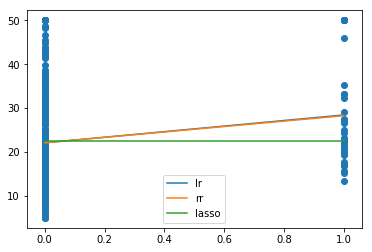

In [50]:
plt.scatter(X_train,y_train)
plt.plot(X_test,y_lr_,label='lr')
plt.plot(X_test,y_rr_,label='rr')
plt.plot(X_test,y_lasso_,label='lasso')
plt.legend()

### 2、预测鲍鱼的年龄

abalone.tsv  最后一列是年龄

In [2]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt

In [3]:
from sklearn.linear_model import LinearRegression

In [5]:
abalone = pd.read_table('./data/abalone.tsv',header=None)
abalone  # 性别 length diameter Height 重量 去壳后的重量 ... 最后一列是年龄

,0,1,2,3,4,5,6,7,8
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,-1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
5,0,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
6,-1,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.3300,20
7,-1,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.2600,16
8,1,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.1650,9
9,-1,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.3200,19


In [6]:
abalone.shape

(4177, 9)

In [12]:
# 分成 训练集 和 测试集  4000之前的去训练 之后的用来测试
X_train = abalone.iloc[:4000,:-1]  # 训练集中的特征值
X_train
y_train = abalone.iloc[:4000,[-1]]  # 训练集中的目标值
y_train
X_test = abalone.iloc[4000:,:-1]  # 测试集中的特征值
X_test
y_test = abalone.iloc[4000:,[-1]]  # 测试集中的目标值
y_test

,8
4000,7
4001,6
4002,8
4003,8
4004,10
4005,9
4006,9
4007,11
4008,12
4009,8


In [13]:
# 获取模型
lr = LinearRegression()

In [14]:
# 使用训练集中的数据 对模型进行训练
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
# 测试一下
y_ = lr.predict(X_test)  # 预测值

In [18]:
# 传入X_test 模型会计算结果 并和 y_test对比 看正确率
lr.score(X_test,y_test)

0.23963086202172468

In [23]:
y_test.values

array([[ 7],
       [ 6],
       [ 8],
       [ 8],
       [10],
       [ 9],
       [ 9],
       [11],
       [12],
       [ 8],
       [ 9],
       [ 9],
       [ 8],
       [ 8],
       [10],
       [10],
       [ 9],
       [11],
       [ 8],
       [10],
       [11],
       [10],
       [11],
       [ 6],
       [ 6],
       [ 7],
       [ 7],
       [ 6],
       [ 8],
       [ 7],
       [ 7],
       [ 8],
       [ 8],
       [10],
       [ 7],
       [11],
       [ 8],
       [10],
       [11],
       [11],
       [12],
       [10],
       [10],
       [ 8],
       [10],
       [ 9],
       [11],
       [11],
       [13],
       [ 9],
       [ 9],
       [10],
       [13],
       [10],
       [10],
       [ 9],
       [11],
       [11],
       [10],
       [ 8],
       [ 8],
       [10],
       [ 9],
       [11],
       [ 9],
       [ 6],
       [ 7],
       [ 6],
       [ 7],
       [ 8],
       [ 7],
       [ 8],
       [ 8],
       [ 9],
       [ 8],
       [ 8],
       [ 8],

In [21]:
y_

array([[ 8.01616991],
       [ 6.80487884],
       [ 8.84798344],
       [ 8.57182829],
       [ 9.42274223],
       [ 9.24576741],
       [10.11117007],
       [ 9.12831807],
       [ 9.8132445 ],
       [ 8.92296252],
       [ 8.00676705],
       [10.26961638],
       [ 9.34553201],
       [10.95246157],
       [10.49663761],
       [ 7.31697391],
       [10.86187573],
       [ 9.28078263],
       [ 9.24484288],
       [ 9.20171654],
       [11.42329824],
       [13.45468316],
       [11.36606576],
       [ 6.22081217],
       [ 6.79688936],
       [ 6.96585313],
       [ 7.44848878],
       [ 7.12676011],
       [ 8.17131522],
       [ 8.50713162],
       [ 7.92559602],
       [ 7.05595063],
       [ 8.05052208],
       [ 9.74574788],
       [ 8.97769555],
       [10.1923619 ],
       [ 9.13499645],
       [ 9.50235123],
       [10.43549086],
       [10.15947416],
       [ 9.99618048],
       [ 8.94318697],
       [ 9.34791942],
       [10.53154914],
       [ 9.92122155],
       [10

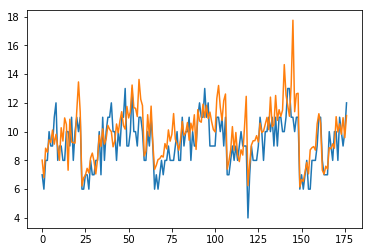

In [26]:
# 绘图 反映 预测的 大概情况 
# 预测值和真实值的对比
plt.plot(y_test.values)
plt.plot(y_)

In [27]:
# 找一个权重比较大的 特征 绘制回归曲线
lr.coef_

array([[  0.06878716,  -1.57837873,  13.58569818,  11.53978102,
          9.14465239, -20.32751448,  -9.56580339,   8.94964873]])

In [28]:
abalone  # 2 这一列 权重比较大 （好像是直径）

,0,1,2,3,4,5,6,7,8
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,-1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
5,0,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
6,-1,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.3300,20
7,-1,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.2600,16
8,1,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.1650,9
9,-1,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.3200,19


In [ ]:
# 绘制 直径 和 年龄的 关系

In [30]:
X_train = abalone.iloc[:,2]  # 训练集的特征值

In [31]:
y_train = abalone.iloc[:,-1]  # 训练集的目标值 （年龄）

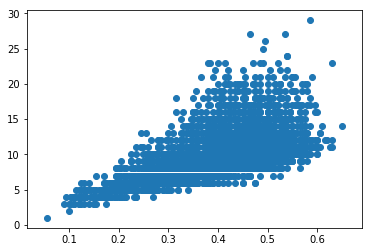

In [33]:
plt.scatter(X_train,y_train)

In [34]:
lr = LinearRegression()

In [39]:
X_train = X_train.values.reshape(-1,1)  # Serise 提取values 然后 变形  很多样本 一个特征 多行1列

In [40]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [43]:
X_test = np.arange(0,0.7,0.1).reshape(-1,1)
X_test

array([[0. ],
       [0.1],
       [0.2],
       [0.3],
       [0.4],
       [0.5],
       [0.6]])

In [45]:
y_ = lr.predict(X_test)
y_

array([ 2.31857352,  4.18556565,  6.05255779,  7.91954992,  9.78654206,
       11.6535342 , 13.52052633])

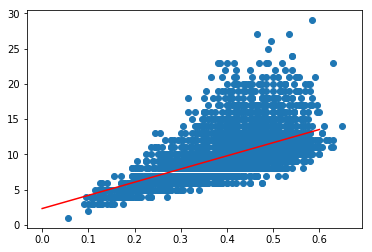

In [49]:
plt.scatter(X_train,y_train)
plt.plot(X_test,y_,color='red')